In [ ]:
import pandas as pd
datos = pd.read_csv('https://raw.githubusercontent.com/ousuga/Proyecto1_IAN/main/precios_pdtos_agricolas.cvs')
datos.head(5)

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
2,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,NaN,NaN
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493


In [ ]:
#Datos duplicados
duplicados = datos.duplicated(keep = 'first')
datos[duplicados]

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
897,Chócolo mazorca,pereira,n.d.,n.d.,03ago2023,4.803663,-75.795791
1017,Zanahoria,pereira,n.d.,n.d.,03ago2023,4.803663,-75.795791
1332,Plátano guineo,pereira,n.d.,n.d.,03ago2023,4.803663,-75.795791
2857,Chócolo mazorca,pereira,n.d.,n.d.,10ago2023,4.803663,-75.795791
2977,Zanahoria,pereira,n.d.,n.d.,10ago2023,4.803663,-75.795791
3022,Coco,pereira,n.d.,n.d.,10ago2023,4.803663,-75.795791
3292,Plátano guineo,pereira,n.d.,n.d.,10ago2023,4.803663,-75.795791
5307,Chócolo mazorca,pereira,n.d.,n.d.,17ago2023,4.803663,-75.795791
5427,Zanahoria,pereira,n.d.,n.d.,17ago2023,4.803663,-75.795791
5742,Plátano guineo,pereira,n.d.,n.d.,17ago2023,4.803663,-75.795791


In [ ]:
#Se eliminan datos duplicados
datos = datos.drop_duplicates()
# Muestra los valores no faltantes y el tipo de dato
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9227 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   producto      9227 non-null   object 
 1   ciudad        9227 non-null   object 
 2   precio        9227 non-null   object 
 3   variabilidad  9227 non-null   object 
 4   fecha         9227 non-null   object 
 5   LATITUD       7092 non-null   float64
 6   LONGITUD      7092 non-null   float64
dtypes: float64(2), object(5)
memory usage: 576.7+ KB


## El precio y la variabilidad debe cambiarse el tipo de dato a float, además, se debe reemplazar los elementos nulos que aparecen como 'n.d.' por None

In [ ]:
#Para cohersionar las variables primero se debe hacer el cambio mencionado
datos = datos.replace(to_replace='n.d.', value=None)

#cambio del tipo de dato para precio y variabilidad
datos['precio'] = datos['precio'].astype(float)
datos['variabilidad'] = datos['variabilidad'].astype(float)

In [ ]:
# Imprime los valores faltantes de cada columna
print(datos.isnull().sum())

producto           0
ciudad             0
precio          2223
variabilidad    2371
fecha              0
LATITUD         2135
LONGITUD        2135
dtype: int64


Se decide eliminar los datos faltantes para precio dado que esto puede suponer que no haya el producto en dicha ciudad.
Para los datos faltantes variabilidad se reemplazará por la mediana de dicho producto para no afectar la centralidad y distribución de los datos.
Para los datos faltantes de latitud y longitud, dado que son datos unicos de las centrales de abastos del país se buscará las ciudades que si tengan dichos datos.

In [ ]:
datos = datos.loc[datos['precio'].notnull()]
print(datos.isnull().sum())

producto           0
ciudad             0
precio             0
variabilidad     148
fecha              0
LATITUD         1385
LONGITUD        1385
dtype: int64


In [ ]:
#Productos
prod = datos['producto'].unique()
lista_var = []

#Se añade a una lista el producto con su respectiva variabilidad
for i in prod:
  aux1 = datos[datos['producto'] == i]
  mediana_var = aux1['variabilidad'].median()
  lista_var.append((i,mediana_var))
lista_var

In [ ]:
import numpy as np
nulos = datos['variabilidad'].isnull()
datos[nulos]
indices = datos['variabilidad'].index
for i in indices:
  if np.isnan(datos['variabilidad'][i]):
    for j in range(len(lista_var)):
      if datos['producto'][i] == lista_var[j][0]:
        datos['variabilidad'][i] = lista_var[j][1]
      else:
        pass
  else:
    pass


In [ ]:
datos.isnull().sum()

producto           0
ciudad             0
precio             0
variabilidad       0
fecha              0
LATITUD         1385
LONGITUD        1385
dtype: int64

##No hay datos faltantes de variabilidad ya que fueron reemplazados por la mediana.

In [ ]:
#Ciudades unicas
ciudades = datos['ciudad'].unique()
lista = []
lista2 = []
for i in ciudades:
  #Se filtra de cada ciudad
  aux = datos[datos['ciudad'] == i]
  #Booleano de elementos no nulos
  no_nulos = aux[['ciudad', 'LATITUD', 'LONGITUD']].notnull()
  #Marco de datos de elementos no nulos
  aux = aux[no_nulos]
  #Fila con elementos no nulos de ciudad, latitud y longitud
  aux = aux.iloc[0]
  #guardar elementos en una lista con la ciudad, latitud y longitud
  lista2.append(aux['ciudad'])
  lista2.append(aux['LATITUD'])
  lista2.append(aux['LONGITUD'])
  #Agregar la lista con los elementos a una lista
  lista.append(lista2)
  lista2 = []
print(lista)

[['armenia', 6.163683758, -75.80995528], ['bogotá', nan, nan], ['bucaramanga', 7.155833544, -73.11156997], ['cali', 3.399043723, -76.57649259], ['cúcuta', nan, nan], ['ibagué', 4.451921427, -75.252591], ['medellín', 6.257590259, -75.61103107], ['neiva', 2.993360046, -75.27236232], ['pereira', 4.803662773, -75.79579093], ['tunja', 5.518472615, -73.37801856], ['santa', nan, nan], ['barranquilla', 10.98152051, -74.82771544], ['pasto', 1.083605497, -77.20610074], ['popayán', 2.471704362, -76.59194419], ['villavicencio', 4.09166877, -73.49291595], ['cartagena', nan, nan], ['montería', 8.584698016, -75.95055079], ['sincelejo', 9.316673928, -75.43174967], ['valledupar', 10.21890277, -73.45784764], ['manizales', 5.08343301, -75.50727881]]


## Ciudades como bogotá, cucuta, santa, entre otras no tienen niguna entrada en LATITUD y LONGITUD, con lo cual la estrategia no se puede utilizar, se decide dejar estas entradas de latitud y longitud vacías y solo realizar el resto del analisis con las otras variables.

In [ ]:
#Verificación de datos vacíos en latitud y longitud
datos[datos['ciudad'] == 'bogotá']

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
2,Arveja verde en vaina,bogotá,7925.0,0.11,01ago2023,NaN,NaN
14,Cebolla cabezona blanca,bogotá,1763.0,0.01,01ago2023,NaN,NaN
26,Cebolla junca,bogotá,3924.0,0.19,01ago2023,NaN,NaN
38,Chócolo mazorca,bogotá,1642.0,0.15,01ago2023,NaN,NaN
50,Fríjol verde*,bogotá,3825.0,-0.09,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
9158,Tomate de árbol,bogotá,2850.0,0.06,29ago2023,NaN,NaN
9170,Arracacha*,bogotá,3208.0,-0.03,29ago2023,NaN,NaN
9182,Papa negra*,bogotá,1538.0,0.00,29ago2023,NaN,NaN
9194,Papa criolla,bogotá,3944.0,0.01,29ago2023,NaN,NaN


In [ ]:
datos[datos['ciudad'] == 'bogotá'].isnull().sum()

producto          0
ciudad            0
precio            0
variabilidad      0
fecha             0
LATITUD         587
LONGITUD        587
dtype: int64

## La cantidad de datos que faltan en latitud y longitud para Bogotá coinciden con la cantidad de registros para esta ciudad.

## Identificación de Outliers
## Se decide escalar las variables de precio y variabilidad con el fin de tener una misma escala de comparación ya que el precio tendrá valores más elevados que la variabilidad.

In [ ]:

#estandarización usando stats.zscore de scipy
import pandas as pd
import scipy
from scipy import stats

#Copiar los datos originales en otro marco de datos
datos2 = datos.copy()

datos2['precio'] = stats.zscore(datos2['precio'])
datos2['variabilidad'] = stats.zscore(datos2['variabilidad'])
datos2.head()
datos2_e = datos2.loc[:,['precio','variabilidad']]
datos2_e
z_score_precio = datos2_e['precio']
z_score_var = datos2_e['variabilidad']

In [ ]:
#Outliers entre -3.5 y 3.5

# Seleccionar los outliers usando un límite de 3.5
z_score_precio_abs = np.abs(z_score_precio)
outliers_zscore_precio = datos2_e[z_score_precio_abs > 3.5]

z_score_var_abs = np.abs(z_score_var)
outliers_zscore_var = datos2_e[z_score_var_abs > 3.5]

In [ ]:
len(outliers_zscore_precio)

14

In [ ]:
len(outliers_zscore_var)

86

##Se decide imputar los datos usando la mediana para no afectar la centralidad de los datos, además no es un gran volumen de datos outliers respeto a la cantidad total de datos.

In [ ]:

mediana_precio = datos['precio'].median()
mediana_var = datos['variabilidad'].median()

precio_imputado = datos.copy()
precio_imputado.loc[outliers_zscore_precio.index, 'precio'] = mediana_precio

var_imputado = datos.copy()
var_imputado.loc[outliers_zscore_var.index, 'variabilidad'] = mediana_var

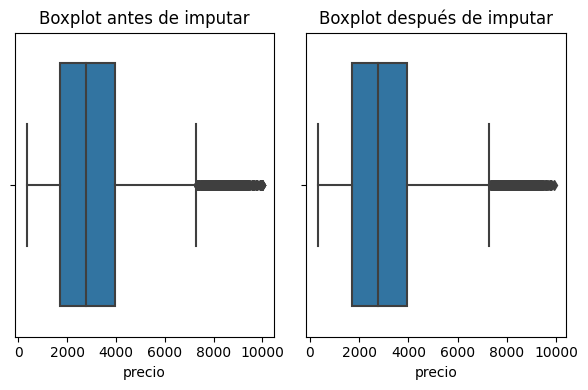

In [ ]:
#Graficar
# Importar librerias seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un marco grafico 1x2
fig, axes = plt.subplots(1, 2, figsize = (6, 4))

# Crear una boxplot antes y después de imputar
sns.boxplot(data = datos, x = 'precio', ax = axes[0])
sns.boxplot(data = precio_imputado, x = 'precio', ax = axes[1])

# Adicionar nombres
axes[0].set_title('Boxplot antes de imputar')
axes[1].set_title('Boxplot después de imputar')

plt.tight_layout()


##Dado que son solo 14 datos, no se nota mucho la diferencia respecto a la imputación

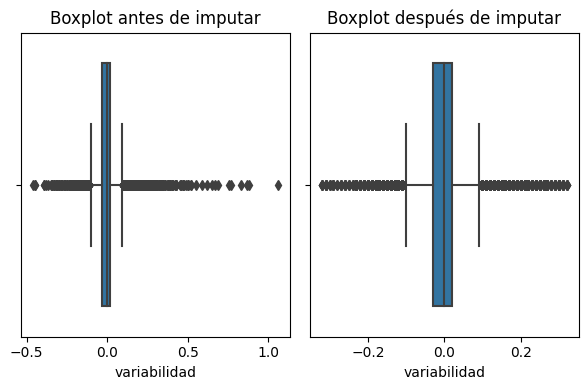

In [ ]:
#Graficar
# Importar librerias seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un marco grafico 1x2
fig, axes = plt.subplots(1, 2, figsize = (6, 4))

# Crear una boxplot antes y después de imputar
sns.boxplot(data = datos, x = 'variabilidad', ax = axes[0])
sns.boxplot(data = var_imputado, x = 'variabilidad', ax = axes[1])

# Adicionar nombres
axes[0].set_title('Boxplot antes de imputar')
axes[1].set_title('Boxplot después de imputar')

plt.tight_layout()

##Se nota más la imputación dado que era un mayor volumen de datos outliers (84 datos) sin embargo, sigue siendo una cantidad baja respecto al total de datos

Preguntas:

-¿Cual es el producto con mayor variabilidad en el precio?

-¿Cual es la ciudad con los precios promedios mas elevados?

-¿Cual es el producto con mayor cantidad de registros?

-¿Cual es el producto con mayor precio promedio en medellin?

-¿Qué ciudad tiene un mayor precio en el Coco?

In [ ]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#1
produ = datos['producto'].unique()
vars = []
for i in produ:
  #filtra base de datos por producto
  aux = datos[datos['producto'] == i]
  #Calcula var promedio
  variabi = aux['variabilidad'].mean()
  vars.append(variabi)
vars = np.abs(vars)
df = {'producto':produ, 'var_prom':vars}
df = pd.DataFrame(df)
df[df['var_prom'] == df['var_prom'].max()]

,producto,var_prom
18,Limón Tahití,0.055544


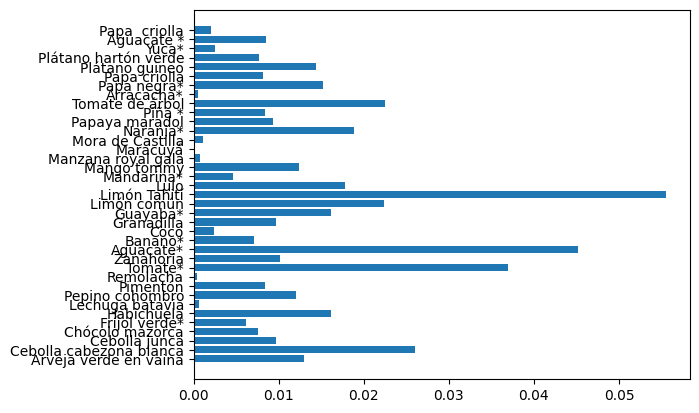

In [ ]:
y_pos = np.arange(len(produ))

# Create bars
plt.barh(y_pos, vars)

# Create names on the x-axis
plt.yticks(y_pos, produ)

# Show graphic
plt.show()

In [ ]:
#2
ciudades = datos['ciudad'].unique()
precios_prom = []

for i in ciudades:
  #filtra base de datos por ciudad
  aux = datos[datos['ciudad'] == i]
  #Calcula precio promedio
  preci = aux['precio'].mean()
  precios_prom.append(preci)

df = {'ciudad':ciudades, 'precio_prom':precios_prom}
df = pd.DataFrame(df)
df[df['precio_prom'] == df['precio_prom'].max()]

,ciudad,precio_prom
11,barranquilla,3772.912844


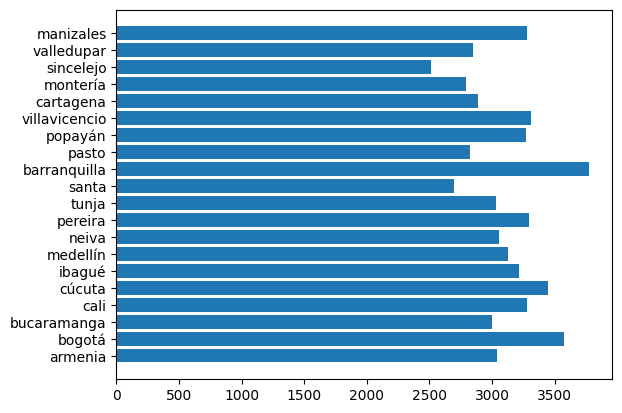

In [ ]:
y_pos = np.arange(len(ciudades))

# Create bars
plt.barh(y_pos, precios_prom)

# Create names on the x-axis
plt.yticks(y_pos, ciudades)

# Show graphic
plt.show()

In [ ]:
#3
produc = datos['producto'].unique()
registros = []
for i in produc:
  registros.append(len(datos[datos['producto'] == i]))

df = {'producto': produc, 'registros': registros}
df = pd.DataFrame(df)
df[df['registros'] == df['registros'].max()]

,producto,registros
5,Habichuela,261
8,Pimentón,261
24,Mora de Castilla,261


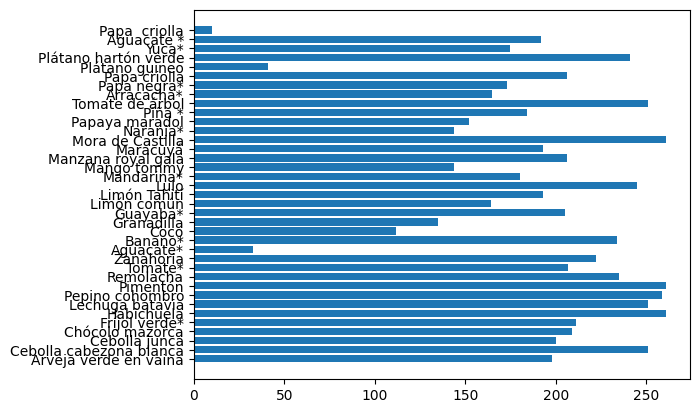

In [ ]:
y_pos = np.arange(len(produc))

# Create bars
plt.barh(y_pos, registros)

# Create names on the x-axis
plt.yticks(y_pos, produc)

# Show graphic
plt.show()

In [ ]:
#4
aux = datos[datos['ciudad'] == 'medellín']
pro_med = aux['producto'].unique()
precios = []

for i in pro_med:
  aux2 = aux[aux['producto'] == i]['precio'].mean()
  precios.append(aux2)

df = {'producto': pro_med, 'precio_prom': precios}
df = pd.DataFrame(df)
df[df['precio_prom'] == df['precio_prom'].max()]

,producto,precio_prom
21,Mango tommy,8733.611111


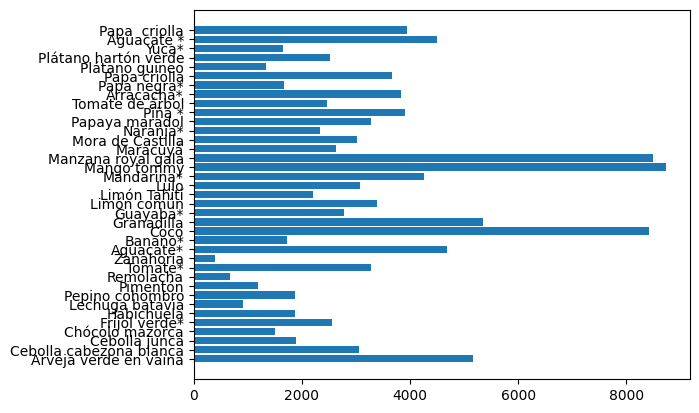

In [ ]:
y_pos = np.arange(len(pro_med))

# Create bars
plt.barh(y_pos, precios)

# Create names on the x-axis
plt.yticks(y_pos, pro_med)

# Show graphic
plt.show()

In [ ]:
#5
df_coco = datos[datos['producto'] == 'Coco']
ciudades = df_coco['ciudad'].unique()
pre = []
for i in ciudades:
  aux = df_coco[df_coco['ciudad'] == i]
  prom = aux['precio'].mean()
  pre.append(prom)

df = {'ciudad': ciudades, 'precio prom': pre}
df = pd.DataFrame(df)
df[df['precio prom'] == df['precio prom'].max()]

,ciudad,precio prom
1,medellín,8410.631579


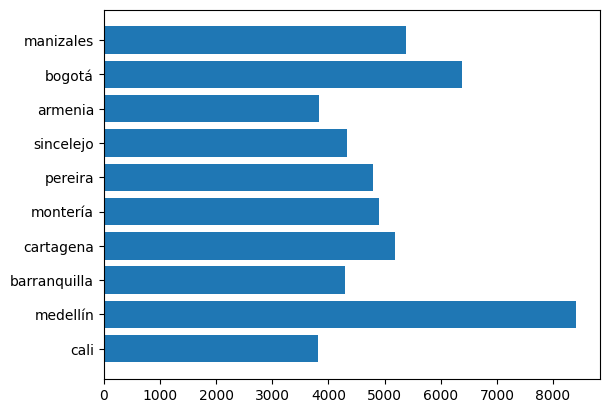

In [ ]:
y_pos = np.arange(len(ciudades))

# Create bars
plt.barh(y_pos, pre)

# Create names on the x-axis
plt.yticks(y_pos, ciudades)

# Show graphic
plt.show()